In [1]:
import pickle

In [2]:
import pandas as pd
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

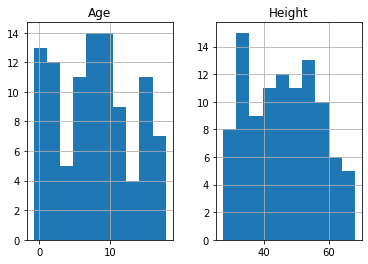

In [3]:
raw_data.hist()

In [4]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [5]:
cleaned_data = raw_data[raw_data['Age'] > 0]
cleaned_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [6]:
cleaned_data.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

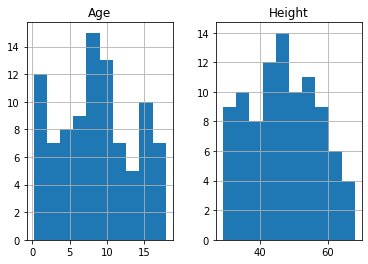

In [7]:
cleaned_data.hist()

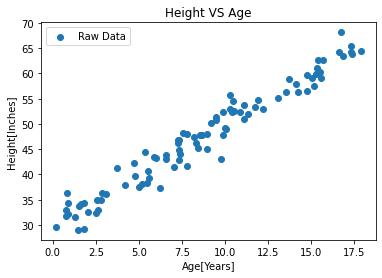

In [8]:
import matplotlib.pyplot as plt
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label='Raw Data')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

In [9]:
parameters = {'alpha' : 40 ,'beta' : 4}

In [10]:
def y_hat(age, params):
  alpha = params['alpha']
  beta = params['beta']
  return alpha + beta * age
age = int(input('Enter age: '))
y_hat(age, parameters)

Enter age: 5


60

In [17]:
def learn_parameters(data, params):
    x, y = data['Age'], data['Height']
    x_bar, y_bar = x.mean(), y.mean()
    x, y = x.to_numpy(), y.to_numpy()
    beta = sum((x-x_bar) * (y-y_bar)) / sum( (x-x_bar)**2)
    alpha = y_bar - beta * x_bar
    params['alpha'] = alpha
    params['beta'] = beta
#beta -> slope
#alpha -> intercept

In [18]:
new_parameter = {'alpha' : 0, 'beta' : 0}
learn_parameters(cleaned_data, new_parameter)
new_parameter

{'alpha': 29.96185761461584, 'beta': 2.0014168989106293}

In [19]:
spaced_ages = list(range(19))
spaced_untrained_predictions = [y_hat(x, parameters) for x in spaced_ages]
print(spaced_untrained_predictions)

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


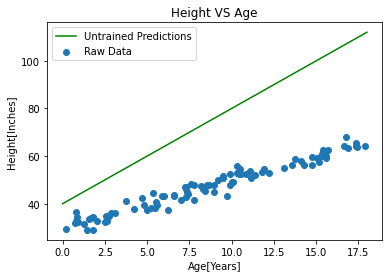

In [20]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'green')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

Trained Predicted Values:  [29.96185761461584, 31.96327451352647, 33.9646914124371, 35.96610831134773, 37.96752521025836, 39.96894210916899, 41.97035900807962, 43.971775906990246, 45.97319280590088, 47.974609704811506, 49.97602660372213, 51.97744350263277, 53.97886040154339, 55.98027730045402, 57.981694199364654, 59.98311109827528, 61.98452799718591, 63.98594489609654, 65.98736179500717]


Text(0, 0.5, 'Height[Inches]')

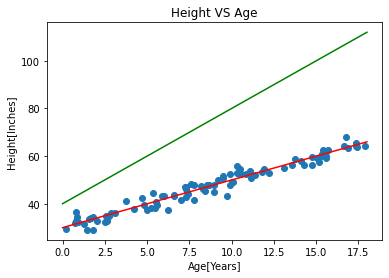

In [21]:
spaced_trained_predictions = [y_hat(x, new_parameter) for x in spaced_ages]
print('Trained Predicted Values: ',spaced_trained_predictions)
plt.scatter(ages,heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'green')
plt.plot(spaced_ages, spaced_trained_predictions, label = 'Trained Predictions', color = 'red')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')

In [22]:
new_age = int(input('Enter age to predict height: '))
y_hat(new_age, new_parameter)

Enter age to predict height: 5


39.96894210916899